### Lending Club: a default ratio prediction study

* [1. Background](#Background)
* [2. Data sources](#Data_sources)
* [3. Importing required libraries](#Library)
* [4. Openning the data file](#File)
* [5. Checking for the missing data](#Missing)
    * [5.1. What columns have the highest number of missing values](#MissingResult)
    * [5.2. What features (columns) are kept?](#keep)
    * [5.3 What features (columns) are dropped?](#Drop)
        * [5.3.1. General features and duplicate features](#General)
        * [5.3.2. Applicant credit performance during the life of loan](#Performance)
        * [5.3.3. Secondary applicants' data](#Secondary)
* [6. Checking the missing data in the truncated dataframe](#TruncatedMissing)
    * [6.1. Dropping the rows with missing data](#ddrop)
* [7. Heat Map of the numerical features](#HM)
    * [7.1. What do we learn from the heat map?](#HML)
        * [7.1.1. Are low and high Fico scores the same?](#Fico)
        * [7.1.2. What is policy code?](#Code)
* [8. Histograms of numerical features](#Hist)
    * [8.1. What do we learn from histograms?](#HistL)
        * [8.1.1. Applicants with more than 10 bankruptcies](#BankR)
        * [8.1.2. Applicants with more than 250 utilization rate](#Util)
* [9. Categorical features](#Cat)
    * [9.1. Loan status](#LoanStatus)
    * [9.2. Loan grade/subgrade distribution](#subgrade)
    * [Distribution of loan issuance year](#year)
    
    





### 1. Background <a class="anchor" id="Background"></a>

LendingClub used to be the biggest peer to peer lending platform until 2020, when they changed their business focus. During its operation, LendingClub would establish a platform for borrowers and investors where borrowers were allowed to create loan requests on its website. They were also required to provide their information like credit score, credit history, desired loan amount and the debt-to-income ratio. Based on the data, LendingClub would decide if the loan request would be accepted and what the interest rate would be. Allowable loan range was between $1,000–40,000 and the return period was 3 or 5 years. Investors would make money from interest rates which were varied from 6.03% to 26.06%. LendingClub would make money from charging an origination fee to its borrowers and a service fee to its investors. The interest rates that LendingCub was offering were better for borrowers and lenders than most of banks and therefore, it was highly received. 

When a request was made, based on the requester’s information such as credit history, LendingClub would decide to either accept or reject the request. For the accepted loans, a credit grade ranging from A to G would be assigned. The credit grade along with other factors would determine the interest rate. For the rejected loan a risk score was assigned. Furthermore, the credit grade would also determine the amount of the origination fee that the requester would be charged, and it would be between 1.1–5.0% of the loan amount. The size of the service fee, that the investor would be charged, would be 1% of all amounts the borrower would pay, which was the requested amount plus the total interest. Therefore, higher interest rates would generate more revenue. However, higher interest rates also indicate a riskier loan which may end up on default and may cause investment loss for LendingClub. Therefore, having a method to predict the risk factor accurately is very desirable. Statistical data shows that about 10% of loans will be defaulted. The question is if we can have a better risk analysis method and ultimately a strong predictive model to decrease loan default ratio by 50% in the next three years.


### 2. Data sources <a class="anchor" id="Data_sources"></a>

The data is from Kaggle website and can be found here: All Lending Club loan data | Kaggle The data is in two files and originate from Lending Club and include information of rejected and accepted loan applications from 2007 to 2018. The accepted file has 2260701 rows and 151 columns, and it includes information about type of loan, funded amount, length of loan, interest rate, grade, installment plan, employment condition (title, length), house ownership status, annual income, loan status, purpose, Fico score (low and high ranges) and if the loan was paid in full. The rejected file has 27648741 rows and 9 columns and include information about the applicant including the debt-to- income ratio, risk score, employment length and amount required.

### 3. Importing required libraries <a class="anchor" id="Library"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import datetime as dt

### 4. Opening the data file <a class="anchor" id="File"></a>

In [2]:
filepath = "C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\accepted_2007_to_2018Q4.csv"
df = pd.read_csv(filepath)

C:\Users\somfl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# An excel file is available from LendingClub with the description of the variables in the data files. The excel sheet
# is downloaded below.
column_desc = pd.read_excel( 'https://resources.lendingclub.com/LCDataDictionary.xlsx')
column_desc = column_desc.iloc[:,0:2]

### 5. Checking for the missing data <a class="anchor" id="Missing"></a>

In [3]:
# I need to find out what columns to drop. 151 columns are alot of data t work with. To decide what column to drop 
# I begin by finding the amount of missing data in each coulmn.

missing1 = df.isnull().sum()
missing2 = 100*df.isnull().mean()
missing = pd.concat([missing1, missing2], axis=1)
missing.columns = ['count', '%']

In [4]:
missing.sort_values("count", ascending=False)[0:60]

,count,%
member_id,2260701,100.000000
orig_projected_additional_accrued_interest,2252050,99.617331
hardship_end_date,2249784,99.517097
hardship_start_date,2249784,99.517097
hardship_type,2249784,99.517097
hardship_reason,2249784,99.517097
hardship_status,2249784,99.517097
deferral_term,2249784,99.517097
hardship_last_payment_amount,2249784,99.517097
hardship_payoff_balance_amount,2249784,99.517097


### 5.1. What columns have highest number of missing values <a class="anchor" id="MissingResult"></a>
It can be seen that member_ids are all missing. Furthermore, there are more than 50 columns, that have more than 38% missing values. The common characteristic in these columns is that, they all are established after the origination of the loan. Therefore, they did not play any role in the loan application approval/rejection. These columns can be dropped. Many of these columns refer to the applicant's credict performance during the loan length. These columns include number of bank cards, number of mortages, installments, trades during the loan, delinquecies and etc.  
Furthermore a few number of loans are joint loans and such loans have information (columns) relevent to the second applicant, which are missing for single applicants. I have decided to focus on single applicants, therefore, any columns regarding the second applicant are will be dropped. 


## 5.2. What features (columns) are kept? <a class="anchor" id="keep"></a>
Any feature which is established before the decision on the loan should be kept. Furthermore, features like loan amount,  interest rate and its term that reflect the decision on the loan should be kept.I am also intersted in studying which states have highest number of application/default, therefore I aslo keep the state of the applicant. These columns and their descreptions are:
1.	revol_util	
2.	dti		
3.	pub_rec_bankruptcies	
4.	chargeoff_within_12_mths	
5.	collections_12_mths_ex_med	
6.	tax_liens	
7.	inq_last_6mths	
8.	total_acc	
9.	delinq_2yrs	
10.	earliest_cr_line	
11.	open_acc	
12.	pub_rec	
13.	acc_now_delinq	
14.	delinq_amnt		
15.	annual_inc		
16.	purpose	
17.	issue_d	
18.	pymnt_plan	
19.	sub_grade	
20.	funded_amnt	
21.	loan_status		
22.	installment	
23.	int_rate		
24.	verification_status	
25.	grade	
26.	term	
27.	disbursement_method	
28.	home_ownership		
29.	addr_state		
30.	initial_list_status	
31.	policy_code	
32.	revol_bal	
33.	fico_range_high	
34.	fico_range_low	
35.	id
36. emp_length

In [5]:
keeplist = ['revol_util','dti', 'pub_rec_bankruptcies', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'tax_liens',
            'inq_last_6mths','total_acc', 'delinq_2yrs', 'earliest_cr_line', 'open_acc', 'pub_rec', 'acc_now_delinq',
            'delinq_amnt', 'annual_inc', 'purpose', 'issue_d', 'pymnt_plan', 'sub_grade', 'funded_amnt', 'loan_status', 
            'installment', 'int_rate', 'verification_status', 'grade', 'term', 'disbursement_method', 'home_ownership', 'addr_state',
            'initial_list_status', 'policy_code', 'revol_bal', 'fico_range_high', 'fico_range_low', 'id', 'emp_length']

### 5.3. What features (columns) are dropped? <a class="anchor" id="Drop"></a>

#### 5.3.1.   General features and duplicate features <a class="anchor" id="General"></a>
member_id: it's the id each borrower (or member) in LendingClub is given and because the source data is deidentified, member_ids are removed before publicizing. So the whole column can be dropped. url, zip_code. loan_amount is similar to funded amount, so is dropped. funded_amnt_inv is the amount investors fund, does not affect decision and is dropped.

####  5.3.2.  Applicant credit performance during the life of loan <a class="anchor" id="Performance"></a>
Because we are trying to find a better model to decide about loan applications, any feature that is not defined prior to the decision on the loan application can be dropped. Many of the avialble features in the source data refer to th applicant credit card performance during the loan and are irrelavent for initial decision making. These feature include number of bank cards, number of mortages, installments, trades during the loan, delinquecies and etc.  
open_rv_24m,  open_rv_12m,  total_bal_il,  open_il_24m,	open_il_12m, open_act_il,  max_bal_bc, inq_fi,  mths_since_recent_inq, months_since_last_record,   mths_since_recent_bc_dlq,   mths_since_last_major_derog,   mths_since_recent_revol_delinq, next_pymnt_d,   mths_since_last_delinq,   il_util,   mths_since_rcnt_il,   all_util,  open_acc_6m,   total_cu_tl,  inq_last_12m. orig_projected_additional_accrued_interes: As the descriptive excel sheet describes this feature is the original projected additional interest amount that will accure for the given hardship payment plan as of the Hardship Start Date. This field will be null if the borrower has broken their hardship payment plan. So it's feature which is only available after application decision and in the case of the borrower's harship in returning the loan. hardship releven columns which include 
hardship_startdate, hardship_amount,  hardship_dpd, hardship_end_date, hardship_flag, hardship_last_payment_amount, hardship_length, hardship_loan_status, hardship_payoff_balance_amount, hardship_reason, hardship_start_date, hardship_status hardship_type, payment_plan_start_date, settlement_term, debt_settlement_flag_date, settlement_status	settlement_date, settlement_amount, settlement_percentage
####  5.3.3.  Secondary applicants' data <a class="anchor" id="Secondary"></a>
less than 5 percent of applications are joint. For now, I'd like to focus on single applications. Therefore, I'll drop any columns and rows with data of the second applicants. These columns are: sec_app_chargeoff_within_12_mths 
sec_app_collections_12_mths_ex_med ,sec_app_earliest_cr_line, sec_app_fico_range_high, sec_app_fico_range_low, sec_app_inq_last_6mths, sec_app_mort_acc, sec_app_mths_since_last_major_derog, sec_app_num_rev_accts, sec_app_open_acc, sec_app_open_act_il, sec_app_revol_util, revol_bal_joint, verification_status_joint, dti_joint, annual_inc_joint, desc 

In [6]:
# Before dropping unwanted columns, I first need to drop joint application rows.
df =df[ df['application_type'] == "Individual"]
print(df.shape)
df['application_type'].unique()

(2139958, 151)


array(['Individual'], dtype=object)

In [7]:
# At this stage, I drop all irrelevant columns discussed before and only keep those columns in the keeplist. 
# After dropping unwanted columns, I check the dataframe shape. It can be seen there are 48 columns left.
df = df[keeplist]
df.shape

(2139958, 36)

## 6. Checking the missing data in the truncated dataframe <a class="anchor" id="TruncatedMissing"></a>
Now that we, have drop more than 100 columns and some rows, I check again if there are missing data

In [8]:
# Check to see number and percentage of the missing data
missing1 = df.isnull().sum()
missing2 = 100*df.isnull().mean()
missing = pd.concat([missing1, missing2], axis=1)
missing.columns = ['count', '%']
missing.sort_values("count", ascending=False)

,count,%
emp_length,130357,6.091568
revol_util,1552,0.072525
pub_rec_bankruptcies,1365,0.063786
collections_12_mths_ex_med,145,0.006776
chargeoff_within_12_mths,145,0.006776
tax_liens,105,0.004907
inq_last_6mths,30,0.001402
open_acc,29,0.001355
acc_now_delinq,29,0.001355
pub_rec,29,0.001355


#### 6.1. Dropping the rows with missing data <a class="anchor" id="ddrop"></a>
Employment length has the higher number of missing points, about 6% (130,000) of employment length is missing. revolving utility rate and banckrupcy records have about 0.07% (1000) missing points. Taking account the huge size of data we can drop all applications, where there is missing data.  

In [9]:
# Dropping the applications with missing data
df = df.dropna()
df.shape

(2006808, 36)

##### Saving the new truncated data frame
At this point that I have somehow cleaned the data, I'd like to save my new truncated dataframe, so that I will not need to open the source data file, which is very time consuming. 

In [209]:
# Saving the new dataframe for easy future references:

SavePath = "C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\TruncatedData.csv"
df.to_csv(SavePath, sep ='\t')

In [10]:
dfobject = df.select_dtypes(object)
dfobject.shape

(2006808, 15)

## 7. Heat Map of the numerical features <a class="anchor" id="HM"></a>

In [11]:
dffloat = df.select_dtypes(np.number)
dffloat.shape

(2006808, 21)

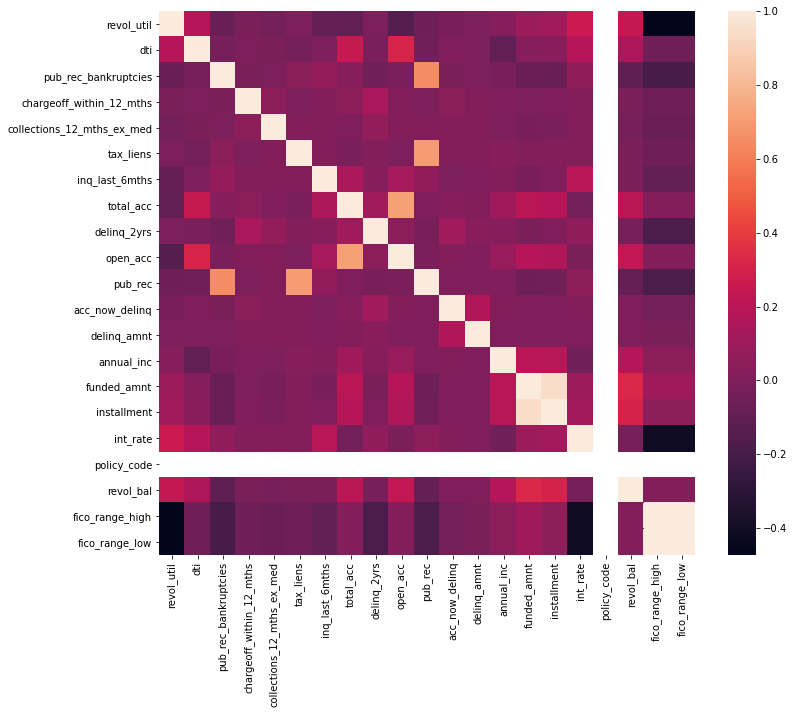

In [12]:
# Show a seaborn heatmap of correlations in dffloat
#I call pandas' `corr()` method on `dffloat` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(dffloat.corr());

## 7.1. What do we learn from the heat map? <a class="anchor" id="HML"></a>
1. _'fico_range_low'_ and _'fico_range_high'_ are highly correlated, so probably an average value can replace the low and high ranges. 

2. While _'policy code'_ is a numerical value, it is not correlated to anything and I will look into it later again.

3. _'installment'_ and _'funded amount'_ are correlated, which is not surprising.

4. Number of _'open account'_ and _'total_account'_ are also correlated, as well as _'public_record'_ and _'pubilc_record_bankrupcies'_.



#### 7.1.1. Are low and high Fico scores the same? <a class="anchor" id="Fico"></a>

As it is shown below, the high and low fico score difference is very small. Therefore, I will use their average as 'fico_score' and will drop the two original columns.

394386     5.0
1896136    5.0
701582     5.0
1042548    5.0
1089871    5.0
          ... 
745130     4.0
745129     4.0
745128     4.0
745127     4.0
2260698    4.0
Length: 2006808, dtype: float64


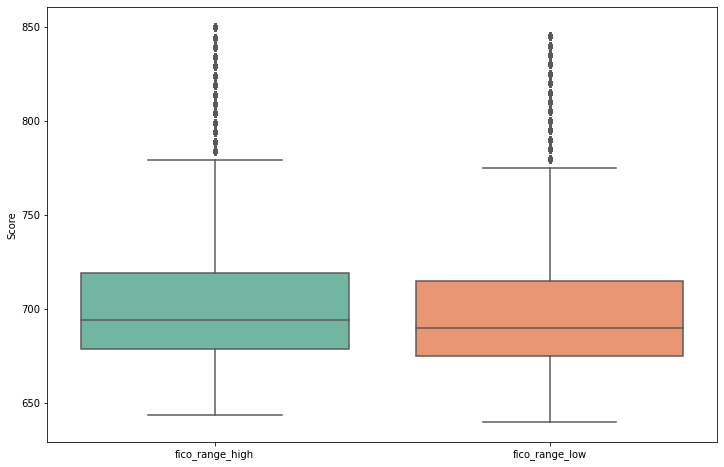

In [13]:
#Create a seaborn boxplot of the fico score to decide if they are similar. It can be seen they are 

plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=df[['fico_range_high', 'fico_range_low']], orient='v', palette="Set2")
plt.xticks()
plt.ylabel('Score');
print((df['fico_range_high']-df['fico_range_low']).sort_values(ascending=False))

In [14]:
# the higher and lower fico score difference is either 5 or 4. Therefore, I used their average as 'fico_score' and drop the two
# columns.
df['fico_score'] = (df['fico_range_high']+df['fico_range_low'])/2
df.drop(columns = ['fico_range_high', 'fico_range_low'], inplace = True)
df.shape

(2006808, 35)

The high and low fico score difference is either 5 or 4. Therefore, I used their average as 'fico_score' and drop the two columns.

#### 7.1.2. What is policy code? <a class="anchor" id="Code"></a>
As it is shown, policy code is 1 for all entries. Therefore, I will drop it.

In [15]:
df['policy_code'].value_counts()

1.0    2006808
Name: policy_code, dtype: int64

In [16]:
df.drop(columns = ['policy_code'], inplace = True)

## 8. Histograms of numerical features <a class="anchor" id="Hist"></a>

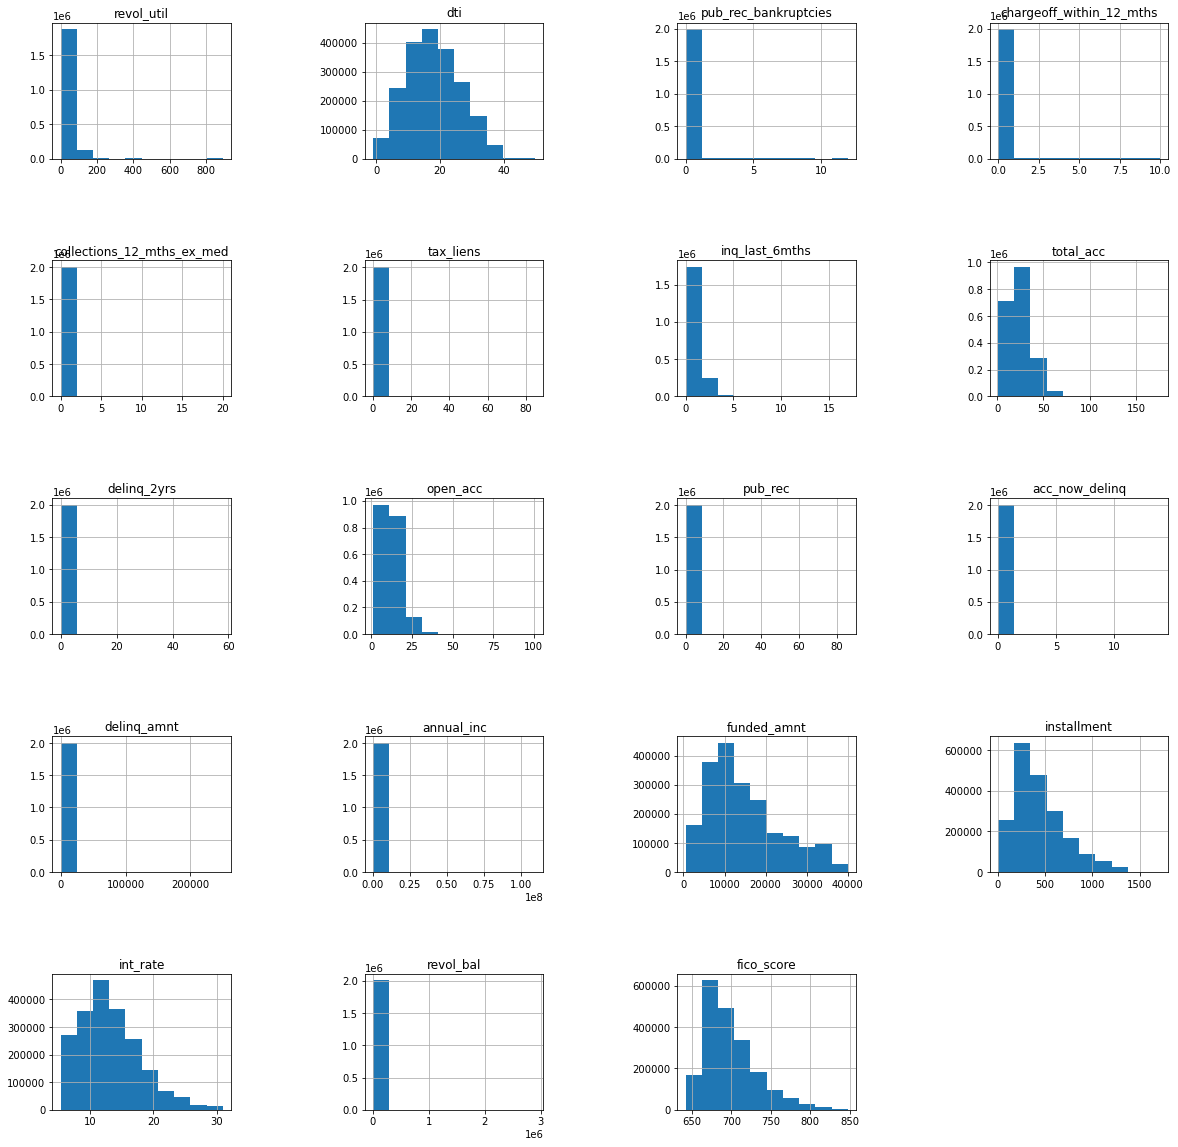

In [17]:
df.select_dtypes(np.number).hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.75, wspace=.75);

## 8.1. What do we learn from histograms? <a class="anchor" id="HistL"></a>
Some features have values that are clustered down the low end such as revol_bal, annual_inc, delinq_amnt and etc. I need to explore these items more and make sure they are correct.



#### 8.1.1. Applicants with more than 10 bankruptcies <a class="anchor" id="BankR"></a>
There are two applicants with more than 10 bancruptcies but as shown in the table, these numbers are smaller than the total public records so, they are probably correct.

In [22]:
df.loc[df['pub_rec_bankruptcies'] > 10, ['pub_rec_bankruptcies','pub_rec']]

,pub_rec_bankruptcies,pub_rec
420591,11.0,12.0
1175624,12.0,12.0


#### 8.1.2. Applicants with more than 250 utilization rate <a class="anchor" id="Util"></a>
There are two applicants with more than 250 utilization rate.

In [18]:
df.loc[df['revol_util']>250]

,revol_util,dti,pub_rec_bankruptcies,chargeoff_within_12_mths,collections_12_mths_ex_med,tax_liens,inq_last_6mths,total_acc,delinq_2yrs,earliest_cr_line,...,grade,term,disbursement_method,home_ownership,addr_state,initial_list_status,revol_bal,id,emp_length,fico_score
1254597,366.6,9.33,0.0,0.0,0.0,0.0,0.0,15.0,0.0,Jun-1996,...,C,60 months,Cash,MORTGAGE,NC,f,2566.0,19076217,< 1 year,717.0
1292903,892.3,14.67,0.0,0.0,0.0,0.0,0.0,9.0,0.0,Oct-1998,...,B,36 months,Cash,RENT,CA,f,2677.0,14539247,10+ years,697.0


In [24]:
objectlist = ['home_ownership', 'initial_list_status', 'addr_state', 'disbursement_method', 'pymnt_plan', 'verification_status', 
'loan_status', 'sub_grade', 'term', 'emp_length']

## 9. Categorical features <a class="anchor" id="Cat"></a>

### 9.1. Loan status <a class="anchor" id="LoanStatus"></a>
Almost half of loans in our dataframe are paid in full. From the rest about 800,000 are current and more than 200,000 of loans are charged off, which is an early indication of default. There is only 30 loans with default status. Therefore, I will assume Charged off as default. 


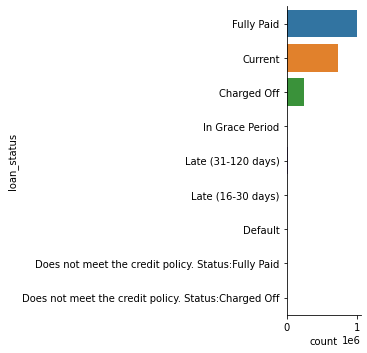

In [27]:
sns.catplot(y="loan_status",data=df, kind="count")

In [28]:
df['loan_status'].value_counts()

Fully Paid                                             1001243
Current                                                 733287
Charged Off                                             242032
Late (31-120 days)                                       17794
In Grace Period                                           6903
Late (16-30 days)                                         3483
Does not meet the credit policy. Status:Fully Paid        1507
Does not meet the credit policy. Status:Charged Off        529
Default                                                     30
Name: loan_status, dtype: int64

### 9.2. Loan grade/subgrade distribution <a class='anchor' id='subgrade'></a>

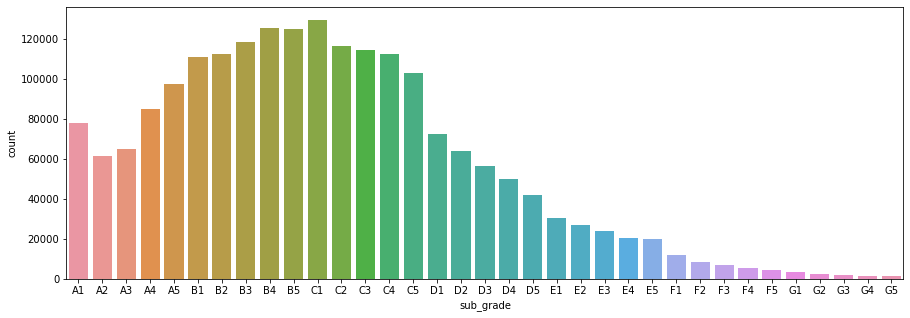

In [41]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x=df["sub_grade"],ax=ax,order=['A1','A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
                                            'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
                                            'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'])
plt.show()

In [218]:
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

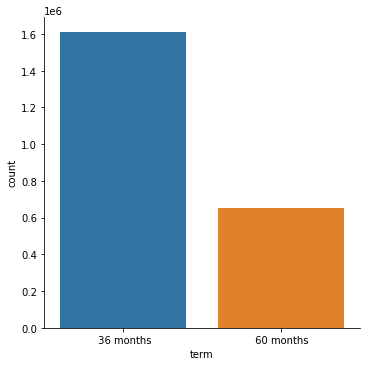

In [24]:
sns.catplot(x="term",data=df, kind="count")

### 9.3. Distribution of loan issuance year <a class='anchor' id='year'></a>
The column in the dataframe is a combination of month-year, I extract the year from the column and add it to the data frame as 'year' and will drop the original issue_d column.

In [45]:
# Extracting year
df["issue_year"] = df["issue_d"].str[4:]

<AxesSubplot:xlabel='issue_year', ylabel='count'>

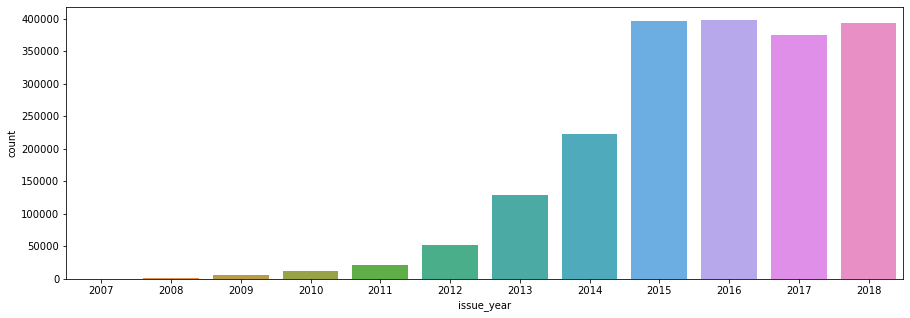

In [54]:
# Plotting the distribution of the year
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x="issue_year", data=df, ax=ax, order=["2007", '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

In [50]:
# Dropping the original issue_d column
df = df.drop(columns="issue_d")

In [51]:
df.shape

(2006808, 34)

In [56]:
2260701-2260668


33

In [62]:
df["grade"].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G', nan], dtype=object)

In [63]:
df["sub_grade"].unique()

array(['C4', 'C1', 'B4', 'C5', 'F1', 'C3', 'B2', 'B1', 'A2', 'B5', 'C2',
       'E2', 'A4', 'E3', 'A1', 'D4', 'F3', 'D1', 'B3', 'E4', 'D3', 'D2',
       'D5', 'A5', 'F2', 'E1', 'F5', 'E5', 'A3', 'G2', 'G1', 'G3', 'G4',
       'F4', 'G5', nan], dtype=object)

In [66]:
df["sub_g"] = df["sub_grade"].str[1]